In [1]:
import os
import sys
sys.path.append("f:\\code\\DS-PAW\\DS-PAW-tools\\code")
import functions.function_normal as fn
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

In [2]:
path = 'f:\\code\\DS-PAW\\DS-PAW-tools\\code\\DOS\\data'
dos = fn.dos_read(path = path)

In [3]:
# "Cu"
# for i in range(len(dos['cellinfo'])):
#     if dos['cellinfo'][i]['Element'] == 'O':
#         if dos['cellinfo'][i]['Position'][0] < 0.4:
#             dos_O = i
#             print('dos_O: ' + str(dos_O)+', '+ str(fn.coordinate_transform(dos,dos['cellinfo'][dos_O]['Position'])))
#     if dos['cellinfo'][i]['Element'] == 'Cu':
#         if dos['cellinfo'][i]['Position'][0] < 0.3:
#             if dos['cellinfo'][i]['Position'][1] > 0.3 and dos['cellinfo'][i]['Position'][1] < 0.7:
#                 if dos['cellinfo'][i]['Position'][2] > 0.2:
#                     dos_Cu = i
#                     print('dos_Cu: ' + str(dos_Cu)+', '+ str(fn.coordinate_transform(dos,dos['cellinfo'][dos_Cu]['Position'])))

"Cu_Sn"
for i in range(len(dos['cellinfo'])):
    if dos['cellinfo'][i]['Element'] == 'O':
        if dos['cellinfo'][i]['Position'][0] > 0.9:
            dos_O = i
            print('dos_O: ' + str(dos_O)+', '+ str(fn.coordinate_transform(dos,dos['cellinfo'][dos_O]['Position'])))
    if dos['cellinfo'][i]['Element'] == 'Cu':
        if dos['cellinfo'][i]['Position'][0] > 0.9:
            if dos['cellinfo'][i]['Position'][1] > 0.4 and dos['cellinfo'][i]['Position'][1] < 0.6:
                if dos['cellinfo'][i]['Position'][2] > 0.2:
                    dos_Cu = i
                    print('dos_Cu: ' + str(dos_Cu)+', '+ str(fn.coordinate_transform(dos,dos['cellinfo'][dos_Cu]['Position'])))

dos_Cu: 25, [8.695204500000001, 0.004528109999999863, 6.119157919999999]


In [4]:
smooth = 1
energy = np.array(dos['DosEnergy'])-dos['EFermi']
# spin1_O = np.array(dos['cellinfo'][dos_O]['spin1']['p'])
# spin1_O_smooth = np.array(gaussian_filter1d(spin1_O, sigma=smooth))
spin1_Cu = np.array(dos['cellinfo'][dos_Cu]['spin1']['d'])
spin1_Cu_smooth = np.array(gaussian_filter1d(spin1_Cu, sigma=smooth))
# spin2_O = np.array(dos['cellinfo'][dos_O]['spin2']['p'])
# spin2_O_smooth = np.array(gaussian_filter1d(spin2_O, sigma=smooth))
spin2_Cu = np.array(dos['cellinfo'][dos_Cu]['spin2']['d'])
spin2_Cu_smooth = np.array(gaussian_filter1d(spin2_Cu, sigma=smooth))

In [5]:
# 求D带中心

# 对D轨道进行加和
spin = np.array(spin1_Cu) + np.array(spin2_Cu)

# 对D轨道进行积分
spin_integral = np.trapz(spin, energy)

# 对D*e进行积分
spin_e_integral = np.trapz(spin*energy, energy)

# 求D带中心
spin_e_center = spin_e_integral/spin_integral
print('D 带中心为：' + str(spin_e_center))

D 带中心为：-2.3818761744473815


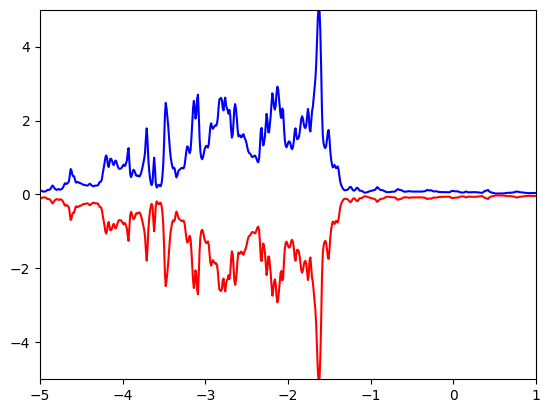

In [8]:
plt.plot(energy, spin1_Cu_smooth, 'b')
plt.plot(energy, -spin2_Cu_smooth, 'r')
# plt.plot(energy, spin1_O_smooth, 'y')
# plt.plot(energy, -spin2_O_smooth, 'y')
plt.xlim(-5, 1)
plt.ylim(-5,5)
plt.show()

In [ ]:
with open(path + '\\dos_cu_zn.txt', 'w') as f:
    f.write('d band center is: ' + str(spin_e_center) + ' eV'+'\n')
    # f.write('energy      spin1_O                   spin2_O                   spin1_Cu                   spin2_Cu\n')
    f.write('energy      spin1_Cu                   spin2_Cu\n')
    for i in range(len(energy)):
        # f.write('%-10s' % '%.03f' % energy[i] + '%-20s' % '%.09f' % spin1_O_smooth[i] + '%-20s' % '%.09f' %
        #         spin2_O_smooth[i] + '%-20s' % '%.09f' % spin1_Cu_smooth[i] + '%-20s' % '%.09f' % spin2_Cu_smooth[i] + '\n')
        f.write('%-10s' % '%.03f' % energy[i] + '%-20s' % '%.09f' % spin1_Cu_smooth[i] + '%-20s' % '%.09f' % spin2_Cu_smooth[i] + '\n')